# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


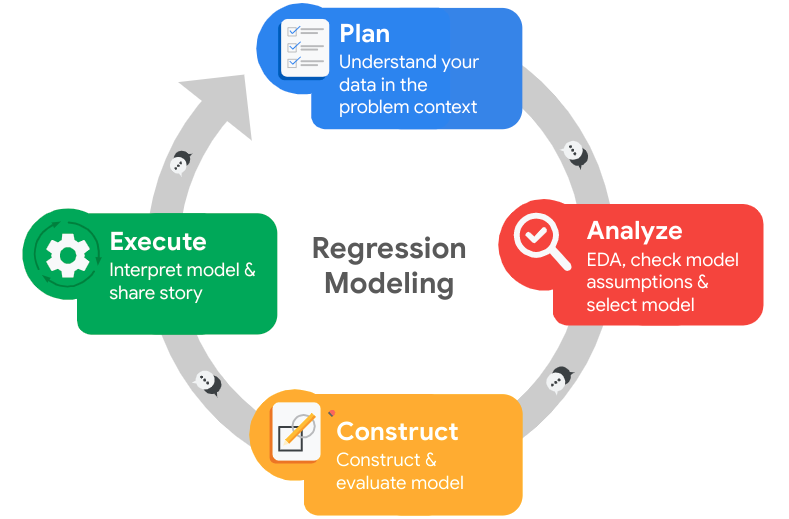

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [170]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

pd.set_option('display.max_columns', None)
plt.rcParams['figure.facecolor'] = 'w'

### Load dataset

In [171]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df = pd.read_csv("./HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [172]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [173]:
df.shape

(14999, 10)

### Gather descriptive statistics about the data

In [174]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Rename columns

In [175]:
# Display all column names
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [176]:
# Rename columns as needed
### YOUR CODE HERE ###
df.rename(columns = ({'Work_accident': 'work_accident', 'Department': 'department', 'average_montly_hours':'average_monthly_hours'}),inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [177]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

`No Missing values were observed throughout the dataset.`

### Check duplicates

Check for any duplicate entries in the data.

In [178]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

3008

In [179]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df.loc[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [180]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df_clean = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_clean

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

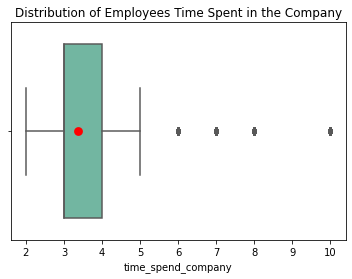

In [181]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig,ax = plt.subplots()
sns.boxplot(data = df_clean, x = 'time_spend_company')
sns.pointplot(data = df_clean, x = 'time_spend_company', color = 'red')
plt.title('Distribution of Employees Time Spent in the Company')
plt.show()

In [182]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df_clean.loc[df_clean.time_spend_company >5].shape

(824, 10)

Time spent >5 is shown to be beyond the upperbound from the visualization above. We will be taking values beyond the value of 5 as outliers.<br>

**A Total of 824 rows contains outliers.**

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [183]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df_clean.left.value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print()
print(df_clean.left.value_counts(normalize = True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


Signicant class imbalance was observed between employees who left and stayed, which will be crucial to factor in during model building later.

In [184]:
# Employees that did left
left = df_clean.loc[df_clean.left == 1]
left.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1991.0,0.440271,0.265207,0.09,0.11,0.41,0.73,0.92
last_evaluation,1991.0,0.721783,0.197436,0.45,0.52,0.79,0.91,1.00
number_project,1991.0,3.883476,1.817139,2.00,2.00,4.00,6.00,7.00
average_monthly_hours,1991.0,208.162230,61.295145,126.00,146.00,226.00,262.50,310.00
time_spend_company,1991.0,3.881467,0.974041,2.00,3.00,4.00,5.00,6.00
work_accident,1991.0,0.052737,0.223565,0.00,0.00,0.00,0.00,1.00
left,1991.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,1991.0,0.004018,0.063277,0.00,0.00,0.00,0.00,1.00


Observations indicates 16.5% of employees (1991) out of the total 11991 employees has left the company. Out of the employees that did left, average tenure of these employees were approximately 4 years (3.88) with a min tenure of 2 years and max tenure of 6 years

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [185]:
# Create a plot as needed
### YOUR CODE HERE ###
df_clean.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [186]:
dept = df_clean.pivot_table(index = ['left','department'], values = 'work_accident', 
                            aggfunc = 'count').sort_values(by =['left','work_accident'], ascending = False).reset_index()
dept.rename(columns = ({'work_accident':'counts'}), inplace = True)

In [187]:
tot_employ = dept.pivot_table(index = ['department'], values = 'counts', aggfunc = 'sum').reset_index()
dic = tot_employ.set_index('department')['counts'].to_dict()

In [188]:
dept['total'] = dept['department'].map(dic)

In [189]:
dept['percent_left_stayed'] = (dept['counts']/dept['total'])*100
dept.head()

,left,department,counts,total,percent_left_stayed
0,1,sales,550,3239,16.980550
1,1,technical,390,2244,17.379679
2,1,support,312,1821,17.133443
3,1,IT,158,976,16.188525
4,1,hr,113,601,18.801997


In [190]:
custom_palette = sns.color_palette("Set2", len(dept['department']))
sns.set_palette(custom_palette)

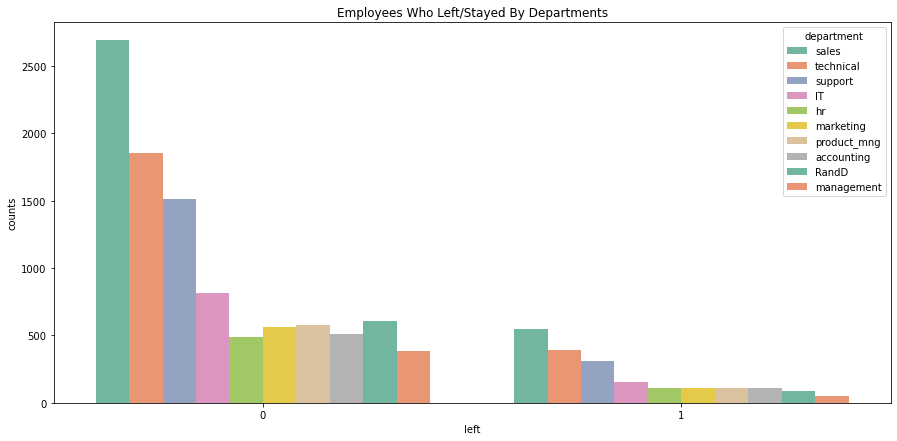

In [191]:
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(data = dept, x = 'left', y = 'counts', hue = 'department')
plt.title('Employees Who Left/Stayed By Departments')
plt.show()

Based on the presented visualization, it is evident that a significant proportion of employees who opted to leave the company are attributed to the `Sales` department. Following closely are the `technical` and `support` departments, contributing to the overall majority of departures.

In [192]:
dept = dept.sort_values(by =['left','percent_left_stayed'], ascending = False)

In [193]:
dept_left = dept.loc[dept.left == 1]

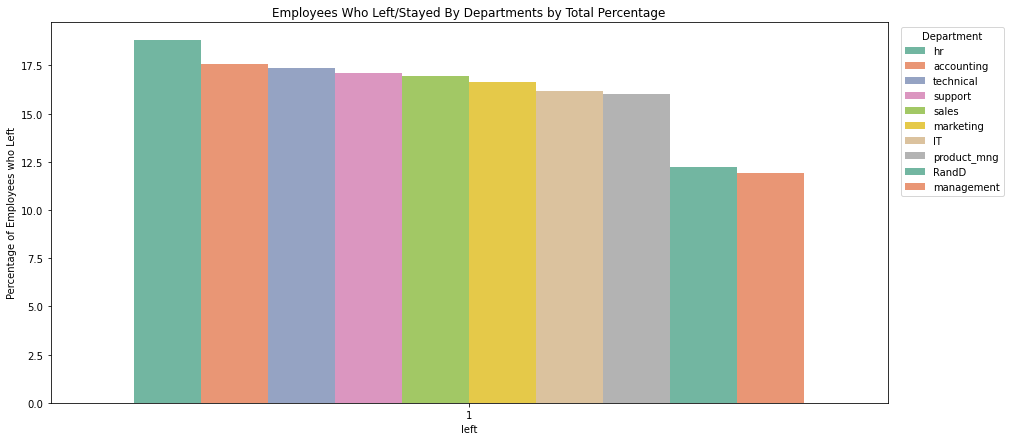

In [194]:
fig,ax = plt.subplots(figsize = (15,7))
sns.barplot(data = dept_left, x = 'left', y = 'percent_left_stayed', hue = 'department')
plt.title('Employees Who Left/Stayed By Departments by Total Percentage')
plt.ylabel('Percentage of Employees who Left')
plt.legend(title = 'Department',loc = 'upper left', bbox_to_anchor=(1.01,1))
plt.show()

Considering the departure percentages across departments, a distinct trend emerges. Notably, the `HR` department registers the highest departure rate at 17.5%, positioning it as the department with the most significant attrition rate. Subsequently, the `Accounting` and `Technical` departments follow suit with notable departure rates. This alternative perspective sheds light on the specific departments that experience a proportionately higher attrition rate of employees, providing a more comprehensive understanding of the organizational dynamics.

To attain a deeper grasp of the underlying factors contributing to these attrition rates, more detailed examination of the distinct variables within the company's operational framework is required. This comprehensive exploration aims to uncover insights into the diverse realms that potentially influence the departure patterns observed among employees within the organization.

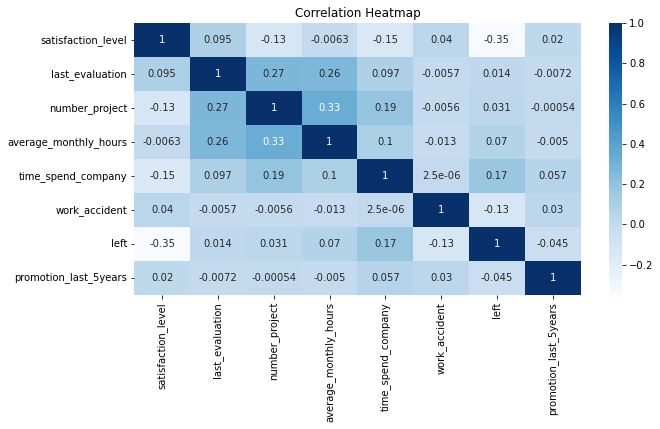

In [195]:
corr = df_clean.corr()
fig,ax = plt.subplots(figsize = (10,5))
sns.heatmap(data = corr,cmap = 'Blues', annot = True)
plt.title('Correlation Heatmap')
plt.show()

From the heatmap observed, there seems to be a slight negative correlation between average monthly hours and satisfaction level. It would be interesting to take a further look into the relationship between the two.

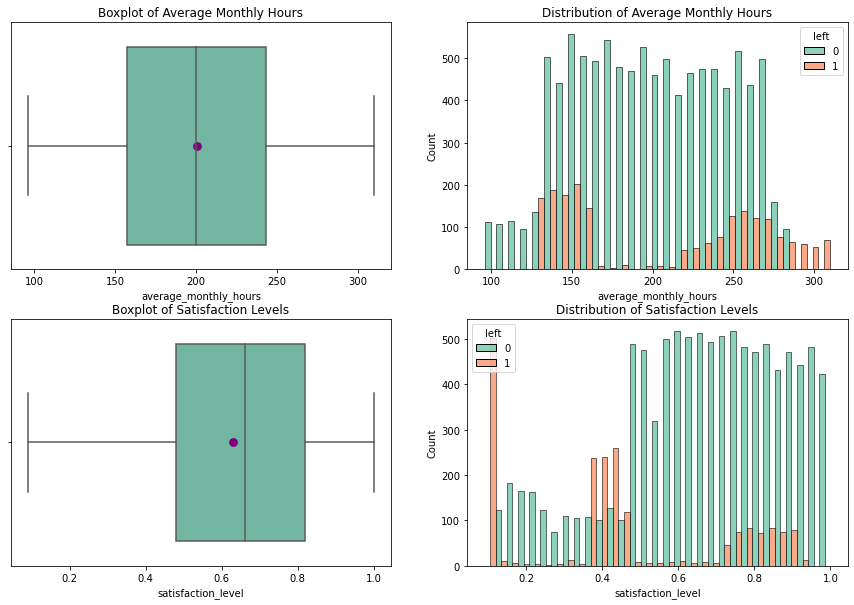

In [196]:
fig,ax = plt.subplots(2,2, figsize = (15,10))
sns.histplot(data = df_clean, x = 'average_monthly_hours', hue = 'left', multiple = 'dodge' ,ax = ax[0,1])
sns.boxplot(data = df_clean, x = 'average_monthly_hours', ax = ax[0,0])
sns.pointplot(data = df_clean, x = 'average_monthly_hours', color = 'purple' ,ax = ax[0,0])
sns.histplot(data = df_clean, x = 'satisfaction_level', ax = ax[1,1], hue = 'left', multiple = 'dodge')
sns.boxplot(data = df_clean, x = 'satisfaction_level', ax = ax[1,0])
sns.pointplot(data = df_clean, x = 'satisfaction_level', color = 'purple' ,ax = ax[1,0])

ax[0,1].set_title('Distribution of Average Monthly Hours')
ax[0,0].set_title('Boxplot of Average Monthly Hours')
ax[1,1].set_title('Distribution of Satisfaction Levels')
ax[1,0].set_title('Boxplot of Satisfaction Levels')
plt.show()

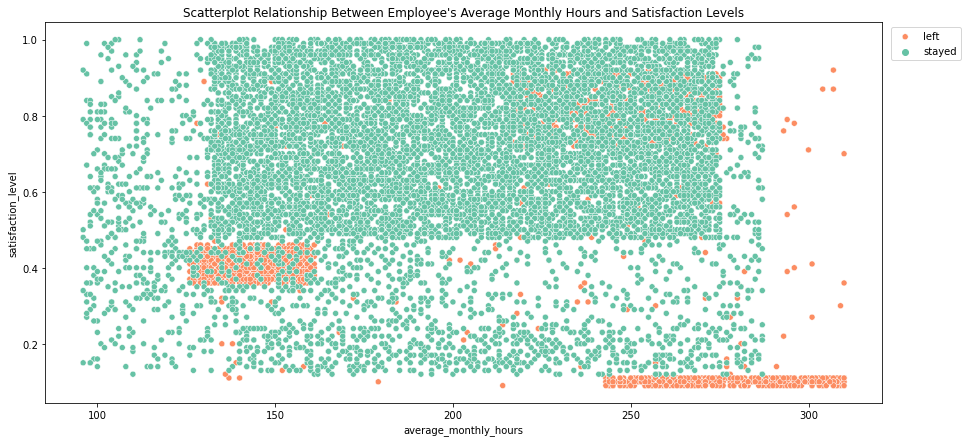

In [197]:
fig,ax = plt.subplots(figsize = (15,7))
sns.scatterplot(data = df_clean, y = 'satisfaction_level', x = 'average_monthly_hours', hue = 'left')
plt.title('Scatterplot Relationship Between Employee\'s Average Monthly Hours and Satisfaction Levels')
plt.legend(bbox_to_anchor = [1.1,1.0], labels = ['left', 'stayed'])
plt.show()

Wow! There seems to be a pattern observed in the scatter plot above. A huge cluster of employees with observed average monthly hours of approximately 230 - 320 hours are reported with satisfactory levels ~ 0.1.

Taking the approximate min hours (230 hours/4 weeks), the group of employee's have been working approximately over `60 hours per work week!`

This is crucial as the reason for the cluster of employees to leave the company, might be a direct result of the overwhelming amount of hours per month they had to work, which also directly affects their overall satisfaction levels.

Another cluster was observed of employees with`~ 130 - 170 work` hours per month. It is difficult to interpret this cluster as despite having higher satisfaction levels (~0.4) and much normal work hours, these group of people still decided to leave the company.

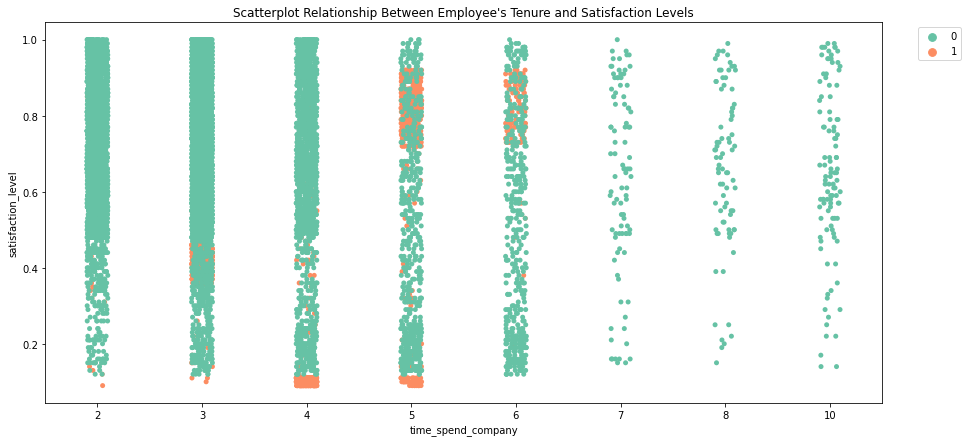

In [198]:
fig,ax = plt.subplots(figsize = (15,7))
sns.stripplot(data = df_clean, y = 'satisfaction_level', x = 'time_spend_company', hue = 'left')
plt.title('Scatterplot Relationship Between Employee\'s Tenure and Satisfaction Levels')
plt.legend(bbox_to_anchor = [1.1,1.0])
plt.show()

In [199]:
# Confirming whether employees staying 7 years and above have indeed left the company or not?
df_clean.loc[df_clean.time_spend_company >=7].left.unique()

array([0], dtype=int64)

From the strip plot above, it is also observed a significant group of people with 4 - 5 tenure years in the company have reported a close to zero satisfactory level and have left the company.

Surprisingly, employees with high tenure `(>= 7 years)` have all still remained with the company. They could be the group of employees in management positions with high salaries.

Oddly, there are few groups of employees from `5-6` tenure years that has left the company, despite having `0.7 - 0.9` satisfactory levels.

Another point of interest would be the relationship between number of projects held and the satisfaction levels of the employees.

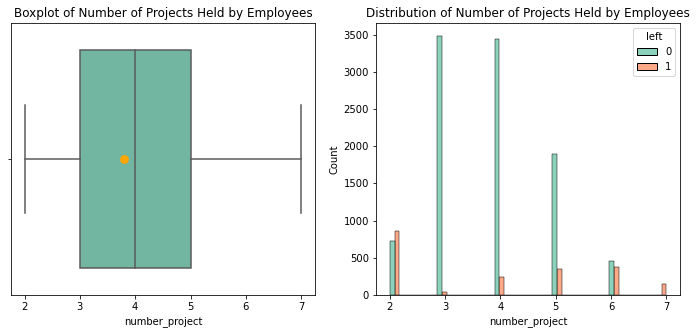

In [200]:
fig,ax = plt.subplots(1,2,figsize = (12,5))
sns.histplot(data = df_clean, x = 'number_project',hue = 'left',multiple = 'dodge',ax = ax[1])
sns.boxplot(data = df_clean, x = 'number_project',ax = ax[0])
sns.pointplot(data = df_clean, x = 'number_project', ax = ax[0], color = 'orange')
ax[1].set_title('Distribution of Number of Projects Held by Employees')
ax[0].set_title('Boxplot of Number of Projects Held by Employees')

plt.show()

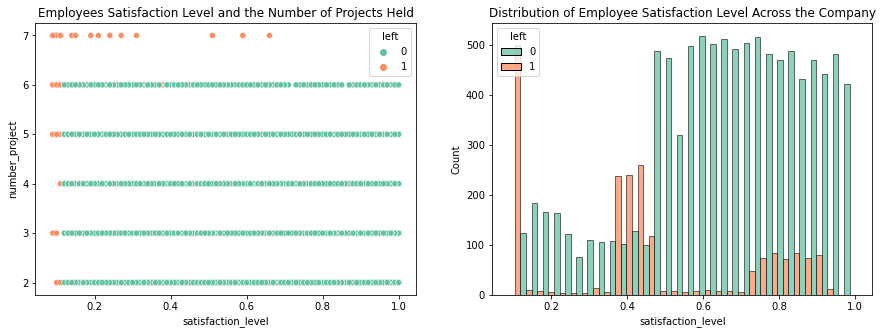

In [201]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
sns.scatterplot(data = df_clean, y = 'number_project', x = 'satisfaction_level', hue = 'left', ax = ax[0])
# sns.pointplot(data = df_clean, y = 'number_project', x = 'satisfaction_level', color = 'red')
sns.histplot(data = df_clean,x = 'satisfaction_level',multiple = 'dodge' ,hue = 'left', ax = ax[1])

ax[0].set_title('Employees Satisfaction Level and the Number of Projects Held')
ax[1].set_title('Distribution of Employee Satisfaction Level Across the Company')

plt.show()

In [202]:
df_clean.loc[df_clean['number_project'] >= 7].left.unique()

array([1], dtype=int64)

From the visualization above, it is evident that individuals who have low satisfaction levels do tend to leave the company compared to individuals with higher satisfaction levels. In terms of projects held, `All employees holding 7 projects has left the company.`

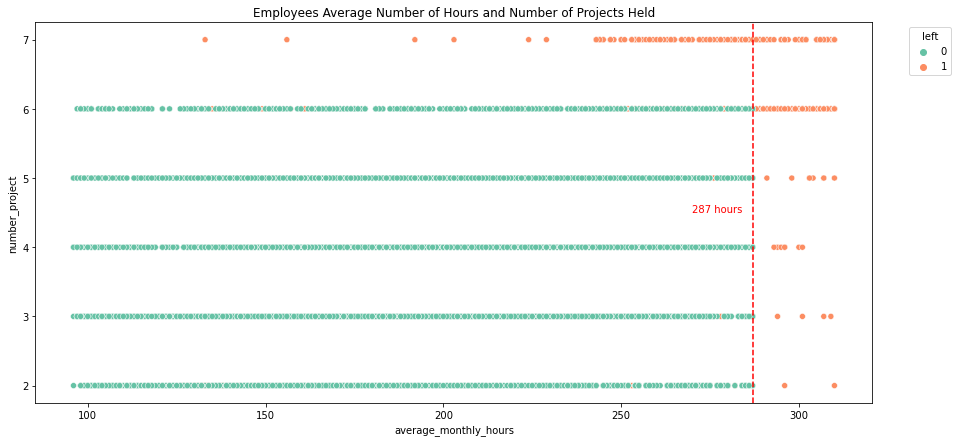

In [203]:
fig,ax = plt.subplots(figsize = (15,7))
sns.scatterplot(data = df_clean, y = 'number_project', x = 'average_monthly_hours', hue = 'left')
plt.title('Employees Average Number of Hours and Number of Projects Held')
plt.legend(title = 'left', bbox_to_anchor = [1.1,1.0])
plt.axvline(287,linestyle = '--', color = 'red')
plt.annotate('287 hours',xy = (270,4.5), color = 'red')
plt.show()

Further observations even show that people holding 6 projects while working more than 287 monthly work hours have a much higher attrition rate compared to employees holding 5 projects or less. Employees holding `7 projects` have **all left** the company disregarding the amount of hours work.

What about in terms of compensation? Are these employees which are contributing higher than normal work hours/ taking up more projects being compensated well enough? 

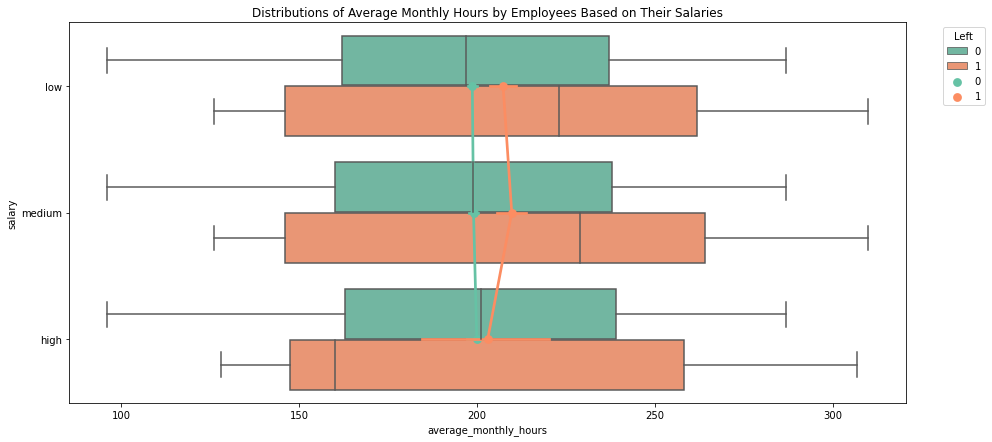

In [204]:
fig,ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = df_clean, x = 'average_monthly_hours',y = 'salary' ,hue = 'left')
sns.pointplot(data = df_clean, x = 'average_monthly_hours',y = 'salary' ,hue = 'left')
plt.title('Distributions of Average Monthly Hours by Employees Based on Their Salaries')

plt.legend(title = 'Left', bbox_to_anchor = [1.1,1])
plt.show()

The results are quite concerning. It seems despite putting in more hours in work, it does not really translate towards getting a higher salary, as evident with the distributions shown above.

Employees with `high` salary on average were observed to have less average work hours, compared to employees taking low and medium salaries. Also to note, there are even employees contributing more than 300 hour work months, but still ended up in the `low` salary category, which is evident why they have left the company.

2023-08-25 09:26:43,803 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\AppData\Local\Temp\ipykernel_14888\2931672234.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



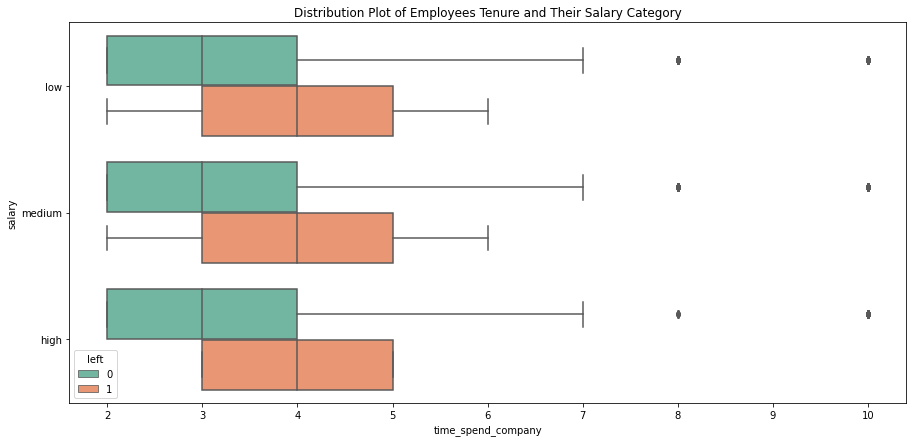

In [205]:
fig,ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = df_clean, x = 'time_spend_company', y = 'salary', hue = 'left')
plt.title('Distribution Plot of Employees Tenure and Their Salary Category')
fig.show()

The visualization above shows that employees with high tenure (`7 - 10`) years tend to stay in the company, `but it might not necessarily be due to higher salaries` as indicated by several employees still staying in the company despite being placed in low and medium salary groups. 

This observation challenges our initial assumption that employees with extended tenures are compensated with higher salaries. Moreover, it raises doubts about the conventional belief that these long-serving employees are also more likely to receive promotions. If longer tenures do not correspond to increased salaries, it follows that the correlation between tenure and promotion should also be scrutinized. 

Further research towards the other benefits the company provides that has attracted these other long tenure employees to keep staying would be recommended.

Perhaps the score of the employees last performance review has resulted to their decision to leave the company?

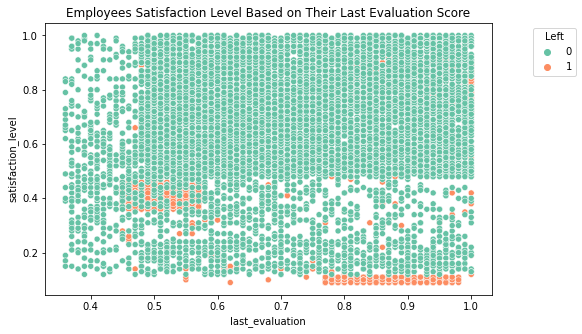

In [206]:
fig, ax = plt.subplots(figsize = (8,5))
sns.scatterplot(data=df_clean, y='satisfaction_level', x='last_evaluation', hue = 'left')
plt.legend(title = 'Left',bbox_to_anchor = [1.2,1])
plt.title('Employees Satisfaction Level Based on Their Last Evaluation Score')
plt.show()

This observation is indeed surprising! In the scatterplot provided earlier, a distinct cluster of employees draws attention. This group possesses an evaluation score surpassing the average threshold (> 0.75). Curiously, despite this favorable evaluation, their satisfaction level remains alarmingly low, hovering around a mere 0.1.

One potential hypothesis behind this phenomenon is a disparity in compensation. It's plausible that these particular employees, despite achieving commendable evaluation scores, were not adequately rewarded for their contributions. Such incongruence between their performance and compensation might have contributed to their decision to leave the company.

To delve deeper into this matter, we will investigate the intricate interplay between promotions in the last 5 years and the final evaluation scores. By examining this relationship, we aim to shed light on whether promotions, or lack thereof, have played a role in shaping the job satisfaction and subsequent attrition of this distinct group.

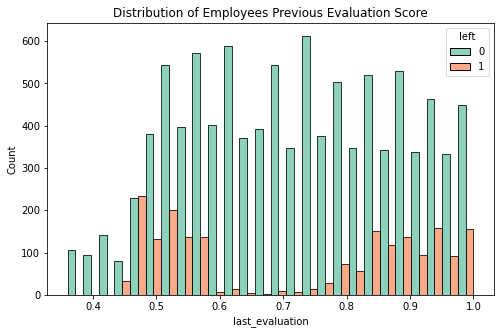

In [207]:
fig, ax = plt.subplots(figsize = (8,5))
sns.histplot(data=df_clean, x='last_evaluation', multiple = 'dodge' ,hue = 'left')
plt.title('Distribution of Employees Previous Evaluation Score')
plt.show()

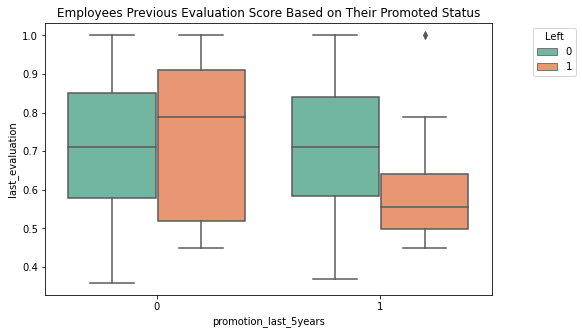

In [208]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(data=df_clean, y='last_evaluation', x='promotion_last_5years', hue = 'left')
# sns.pointplot(data=df_clean, y='last_evaluation', x='promotion_last_5years', hue = 'left')
plt.legend(title = 'Left',bbox_to_anchor = [1.2,1])
plt.title('Employees Previous Evaluation Score Based on Their Promoted Status')
plt.show()

In [209]:
df_clean.pivot_table(index = ['promotion_last_5years','left'], values = 'last_evaluation', aggfunc = ['mean','median'])

mean          median
                           last_evaluation last_evaluation
promotion_last_5years left                                
0                     0           0.715754           0.710
                      1           0.722219           0.790
1                     0           0.711282           0.710
                      1           0.613750           0.555

Upon delving deeper into the data, a clear pattern emerges: employees with commendable evaluation scores are inexplicably departing from the company. This phenomenon seems to stem from a potential disparity in promotions and compensation, where deserving individuals with stellar evaluation scores of approximately 0.7 or higher are being overlooked, while those with comparatively lower average scores around 0.61 are being promoted, only to follow the trend of leaving eventually.

Lets take a further look between the relationship between the average monthly hours contributed by the employee and whether they were promoted in the past 5 years.

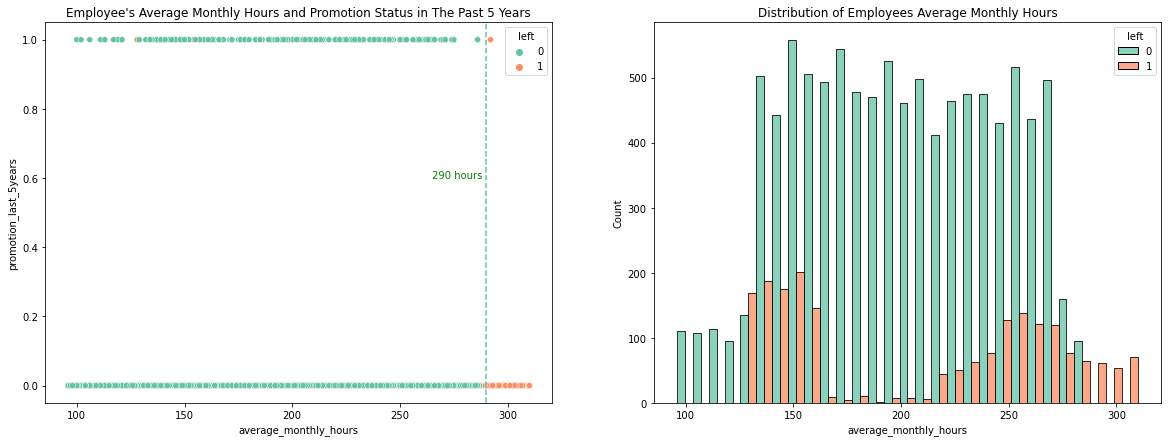

In [210]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
sns.histplot(data = df_clean, x = 'average_monthly_hours', multiple = 'dodge' ,hue = 'left', ax = ax[1])
sns.scatterplot(data = df_clean, x = 'average_monthly_hours',y = 'promotion_last_5years',hue = 'left', ax = ax[0])
ax[0].set_title('Employee\'s Average Monthly Hours and Promotion Status in The Past 5 Years')
ax[1].set_title('Distribution of Employees Average Monthly Hours')
ax[0].axvline(290, linestyle = '--', label = '290 hours')
ax[0].annotate('290 hours',xy = (265,0.6), color = 'green')
plt.show()

Several insights were able to be collected from the visualizations:<br>
- Insight 1:<br>
A significant majority of employees who have logged more than 290 monthly working hours `have not received promotions within the last 5 years.`<br>

- Insight 2:<br>
Employees who contributed the highest number of working hours were not only overlooked for promotions, but also constituted a segment that ultimately left the company.<br>

- Insight 3:<br>
It is noteworthy that a substantial portion of employees who were promoted in the past 5 years chose to remain with the company, showcasing a `positive correlation between promotions and employee retention.`

At the cutoff point of 290 monthly work hours, we will conduct a more detailed analysis to uncover underlying factors contributing to employee attrition and promotion dynamics.

In [211]:
# Getting employees with more than 290 monthly work hours
df1 = df_clean.loc[df_clean.average_monthly_hours >= 290]

df2 = df1.pivot_table(index = ['left','promotion_last_5years','salary','department'],
                values = ['number_project','time_spend_company'], aggfunc = {'number_project':'count','time_spend_company':'mean'})
df2.rename(columns = ({'number_project':'number_of_employees', 'time_spend_company':'average_tenure'}), inplace = True)
df2 = df2.sort_values(by = ['number_of_employees','department'], ascending = False)
df1.left.unique()

array([1], dtype=int64)

In [212]:
print(f'Average tenure of Employees with over 290 monthly work hours:{df2.average_tenure.mean()}years')

Average tenure of Employees with over 290 monthly work hours:4.142346445824707years


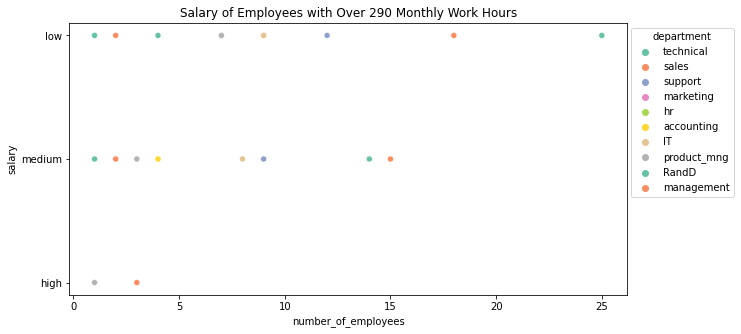

In [213]:
fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df2, y = 'salary', x = 'number_of_employees', hue = 'department')
plt.legend(title = 'department', bbox_to_anchor = [1.2,1.0])
plt.title('Salary of Employees with Over 290 Monthly Work Hours')

plt.show()

Once again, we are able to derive several insights:

- Insight 1:<br>
Upon close examination, a striking observation emerges: all employees who have committed to working over `290 monthly hours` have chosen to `depart from the company.`

- Insight 2:<br>
An interesting correlation comes to light as we explore this departure trend. Despite investing substantial hours in their roles, a significant majority of these employees are concentrated in the `low to medium salary brackets`, accentuating the incongruity between their dedication and compensation.

- Insight 3:<br>
Focusing on the contextual backdrop of these departures, it becomes evident that a noteworthy portion of the departed employees were associated with the `technical and sales departments`. This concentration underscores potential areas of concern within these specific segments of the organization.

### Insights

In essence, the company's significant attrition rate can be attributed to severe mismanagement. An evident link exists between employee turnover and both the average monthly hours worked, and the number of projects undertaken. Moreover, despite the considerable overtime dedicated to the company, employees were inadequately compensated, as evidenced by their placement in the lower to mid-tier salary brackets.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Logistic Regression


#### Encoding our variables

In [214]:
df_clean_encode = df_clean.copy()

In [215]:
df_clean_encode['salary_enc'] = df_clean.apply(lambda x: 0 if x.salary == 'low' else 1 if x.salary == 'medium' else 2, axis = 1)

In [216]:
df_clean_encode.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,salary_enc
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [217]:
df_clean_encode.drop(columns = ['salary'], inplace = True)

In [218]:
df_clean_encode = pd.get_dummies(df_clean_encode, drop_first = True)

#### Handling Our Outliers

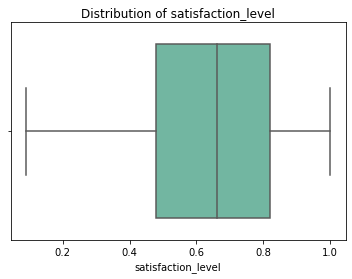

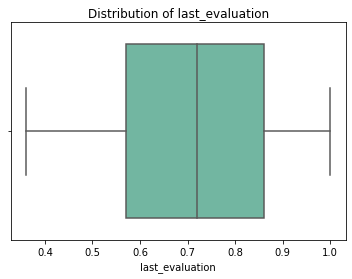

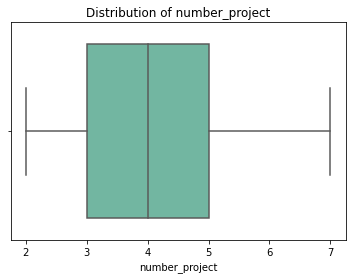

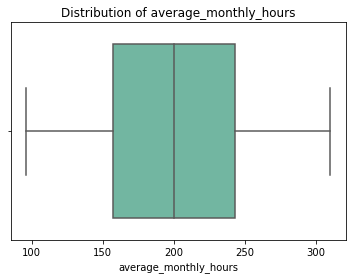

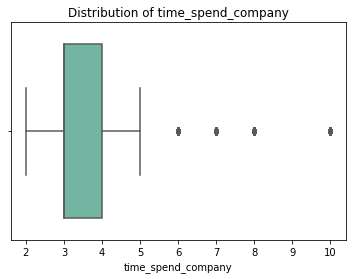

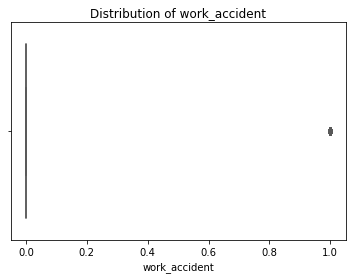

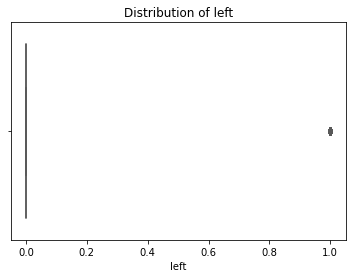

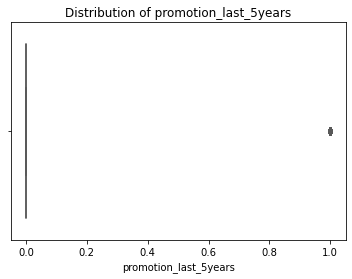

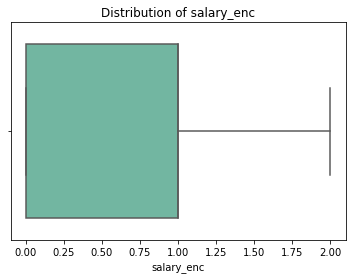

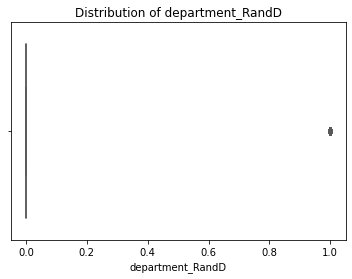

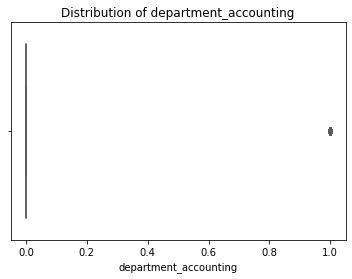

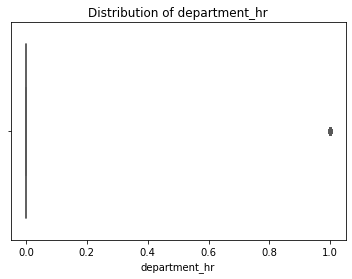

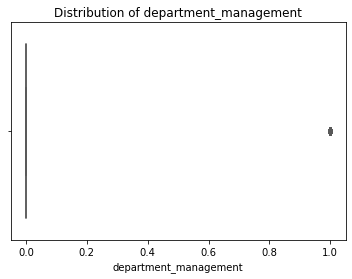

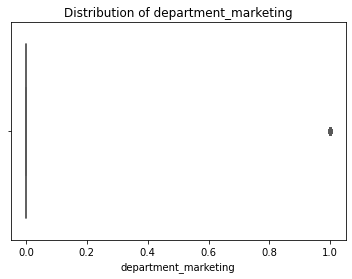

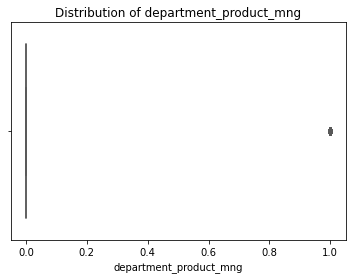

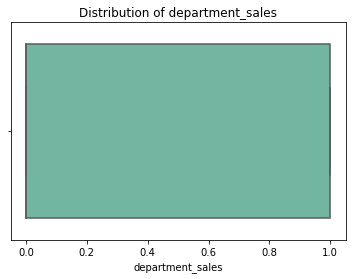

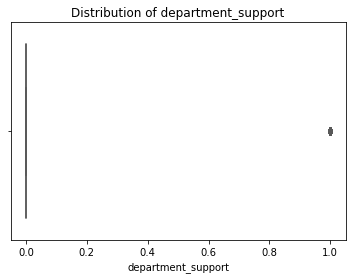

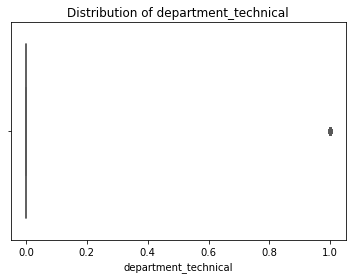

In [219]:
# Checking for outliers in our encoded dataset
for x in df_clean_encode.columns:
    sns.boxplot(data = df_clean_encode, x = x)
    plt.title(f'Distribution of {x}')
    plt.show()

In [220]:
# Removing outliers from the 'time_spend_company' field using IQR Method
p25,p75 = np.percentile(df_clean_encode['time_spend_company'],[25,75])
factor = 1.5
IQR = p75 - p25
UL = p75 + (IQR * 1.5)
LL = p25 - (IQR * 1.5)

df_clean_encode_outlier = df_clean_encode.loc[(df_clean_encode.time_spend_company <= UL) & (df_clean_encode.time_spend_company >= LL)]

We now isolate our target and independent variables and proceed to split them accordingly.

In [221]:
y = df_clean_encode_outlier[['left']]
X = df_clean_encode_outlier.drop(columns = ['left'])

In [222]:
y.value_counts(normalize = True)*100

left
0       83.146772
1       16.853228
dtype: float64

It is also important to note that there is a signicant class imbalance (left:83%, stay: 17%) between employees who left and stayed, will stratify our dependant variable as well.

In [223]:
#Splitting our data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, stratify = y)

#### Fitting and Training our Model

In [224]:
lr = LogisticRegression(random_state = 42,solver='liblinear')
lr.fit(X_train,y_train)

2023-08-25 09:26:46,642 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LogisticRegression(random_state=42, solver='liblinear')

In [225]:
y_pred = lr.predict(X_test)

#### Reviewing the efficiency of the model with different metrics

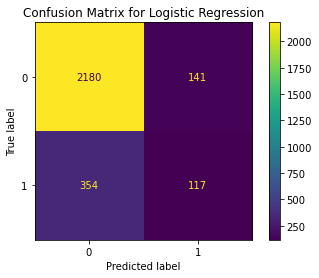

<Figure size 1080x504 with 0 Axes>

In [226]:
cm = confusion_matrix(y_test,y_pred, labels = None)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot(values_format = '')
plt.title("Confusion Matrix for Logistic Regression")
plt.figure(figsize = (15,7))
plt.show()

In [227]:
acc = accuracy_score(y_test,y_pred)*100
pre = precision_score(y_test,y_pred)*100
rec = recall_score(y_test,y_pred)*100
f1 = f1_score(y_test,y_pred)*100

print(f'Accuracy Score: {acc}')
print(f'Precision Score: {pre}')
print(f'Recall Score: {rec}')
print(f'f1 Score: {f1}')

Accuracy Score: 82.27077363896849
Precision Score: 45.348837209302324
Recall Score: 24.840764331210192
f1 Score: 32.098765432098766


In [228]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2534
           1       0.25      0.45      0.32       258

    accuracy                           0.82      2792
   macro avg       0.59      0.66      0.61      2792
weighted avg       0.88      0.82      0.84      2792



Based on the classification report, it's evident that our model exhibits stronger predictive ability when identifying employees who will remain with the company, boasting a high precision score of `94%` alongside minimal occurrences of false positives. Conversely, its performance is comparatively less impressive when gauging the likelihood of an employee departing, yielding a precision score of `25%` and limited instances of true positives. 

On a broader scale, our logistic regression model delivers an overall accuracy of 82%, underscored by a robust precision score of 88%, recall score of 82%, and an F1 score of 84%. `It's worth noting, however, that when tasked with the specific challenge of anticipating employee departures, the need for an alternative model becomes apparent.`

### Decision Tree

In [229]:
dt = DecisionTreeClassifier(random_state = 42)

In [230]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

#### Hyper Parameter Tuning and Cross Validation

In [231]:
# Setting up the Hyper Parameters and scoring metrics
tree_para = {'max_depth':[None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = ['accuracy', 'precision', 'recall', 'f1']

Since the consequence of a false negative (Predicting that an employee is staying, but infact he is leaving the company) is much higher compared to a false positive, we will refit the tuned model with recall score as the primary metric for mdoel validation.

In [232]:
%%time
# Fitting our tuned model
dt_cv = GridSearchCV(dt,tree_para, scoring = scoring, cv = 5, refit = 'recall')
dt_cv.fit(X_train, y_train)

CPU times: total: 23.6 s
Wall time: 23.6 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [233]:
# Identifying the best parameters from hypertuning
print(dt_cv.best_params_)

print()

# Identifying the best recall metrics from hypertuning
print(dt_cv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 2}

0.922035937147583


In [234]:
## Writing a a function to extract the mean scoring metrics from all 5 cross validatoin folds
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.loc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                        })
  
    return table

In [235]:
dt_table = make_results('Decision Tree',dt_cv,'recall')
dt_table

,model,precision,recall,F1,accuracy
0,Decision Tree,0.912665,0.922036,0.917003,0.971821


Cross validation performed on the Decision Tree model has shown strong indicators for all scoring metrics, showing an overall good performance.

However, Decision Trees tend to be prone to overfitting, it would be recommended to construct a random forest model as well to compare the scoring metrics of the results.

#### Random Forest

In [236]:
rf = RandomForestClassifier(random_state = 42)

In [247]:
rf_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [248]:
rf_cv = GridSearchCV(rf,rf_params, scoring = scoring, cv = 5, refit = 'recall')

In [249]:
%%time
rf_cv.fit(X_train,y_train)

2023-08-25 09:28:20,215 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:28:21,141 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:28:22,047 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:28:46,857 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:28:47,747 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:28:48,632 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:29:14,060 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:29:15,544 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:29:17,074 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:29:42,423 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:29:43,972 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:29:44,864 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:30:09,932 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:30:10,998 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:30:12,064 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:30:40,895 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:30:42,651 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:30:44,364 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:31:13,797 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:31:15,571 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:31:17,276 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:31:46,055 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:31:47,089 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:31:48,150 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:32:17,829 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:32:19,072 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:32:21,234 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:32:57,455 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:32:59,545 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:33:01,653 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:33:37,800 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:33:39,089 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:33:40,358 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:34:16,011 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:34:17,299 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:34:18,572 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:34:56,812 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:34:59,422 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:35:01,956 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:35:45,266 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:35:47,808 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:35:49,327 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:36:31,804 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:36:33,333 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:36:34,860 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:37:17,337 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:37:19,884 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:37:22,442 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:38:12,355 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:38:15,889 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:38:19,560 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:39:19,600 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:39:21,721 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:39:23,877 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:40:23,328 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:40:25,488 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:40:29,002 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:41:28,727 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:41:32,209 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:41:35,619 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:42:42,627 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:42:45,258 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:42:47,919 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:44:02,154 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:44:04,783 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:44:07,568 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:45:22,511 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:45:26,972 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:45:31,478 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

2023-08-25 09:46:47,706 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:46:52,468 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

2023-08-25 09:46:55,150 [14888] WARNING  py.warnings:109: [JupyterRequire] C:\Users\gibso\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

CPU times: total: 19min 9s
Wall time: 19min 9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [250]:
# Saving our model to ease run time:
import pickle
path = './model/'

In [251]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [252]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [253]:
# Write pickle
write_pickle(path, rf_cv, 'random_forest')

In [254]:
# Read pickle
rf_cv = read_pickle(path, 'random_forest')

In [255]:
rf_cv.best_score_

0.9213267172894269

In [256]:
rf_cv.best_params_

{'max_depth': 3,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [257]:
# Extracting the scoring matrices into a table:
rf_table = make_results('Random_Forest', rf_cv, 'recall')
rf_table

,model,precision,recall,F1,accuracy
0,Random_Forest,0.910407,0.921327,0.915586,0.971343


Cross validation performed on the Random Forest model has also shown strong indicators for all scoring metrics, showing an overall good performance.

We will compare both the decision tree and random forest model to select the champion model.

In [258]:
# Combining the CV results from both models.
pd.concat([dt_table,rf_table], axis = 0)

,model,precision,recall,F1,accuracy
0,Decision Tree,0.912665,0.922036,0.917003,0.971821
0,Random_Forest,0.910407,0.921327,0.915586,0.971343


The assessment scores of the random forest model demonstrate superior performance compared to those of the decision tree model, except for a minor deviation in recall where the random forest model exhibits a negligible reduction of around 0.001. Overall, these findings suggest that the random forest model surpasses the decision tree model in terms of its predictive capabilities.

The model will be further evaluated with the test data.

In [259]:
# Fitting the test data with the champion model
rf_final = rf_cv.best_estimator_
rf_pred = rf_final.predict(X_test)

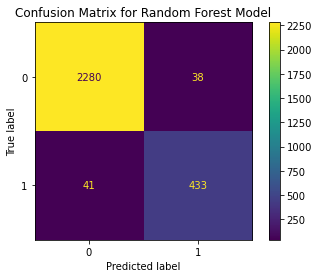

In [260]:
cm = confusion_matrix(rf_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_final.classes_)
disp.plot(values_format ='')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [261]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2318
           1       0.92      0.91      0.92       474

    accuracy                           0.97      2792
   macro avg       0.95      0.95      0.95      2792
weighted avg       0.97      0.97      0.97      2792



The test scores closely mirror the validation scores, indicating a strong level of consistency. This alignment between the two sets of scores is a positive sign, suggesting the robustness of the model. More importantly, since this specific test set was exclusively employed for evaluating this model, there is greater confidence that its performance on this data accurately reflects its expected performance on unfamiliar, unseen data.

When comparing the random forest model to the previously used logistic regression model, it becomes evident that the random forest model demonstrates a notably higher capacity for effectively `addressing false negatives`. This characteristic aligns precisely with the desired behavior of the model for predicting employee attrition within the company.

Lets examine the feature importances to get a more detailed understanding of the different fields.

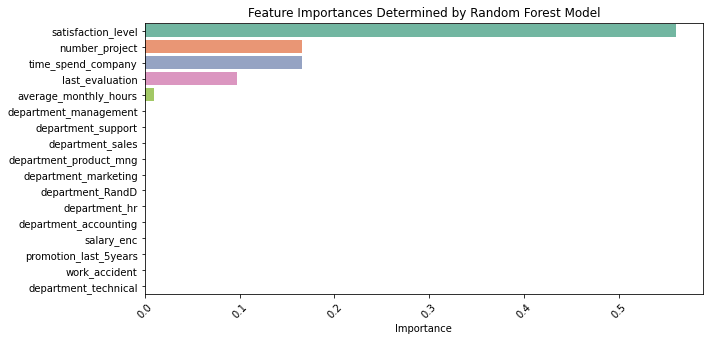

In [262]:
features = pd.DataFrame(rf_final.feature_importances_, index = X.columns)
features.rename(columns = {0: 'Importance'}, inplace = True)
features = features.sort_values('Importance', ascending = False)

fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(data = features, y = features.index, orient = 'h' ,x = 'Importance')
plt.title('Feature Importances Determined by Random Forest Model')
plt.xticks(rotation = 45)
plt.show()

Based on the feature importance visualization above, it is determined `satisfaction_level`, `number_project` and `time_spend_company` are the features of highest importance towards predicting our dependent variable `left` as determined by the random forest model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

In [263]:
lr_rep = classification_report(y_pred,y_test, output_dict = True)
dt_rep = classification_report(rf_pred,y_test, output_dict = True)

In [264]:
acc = pd.DataFrame({'Accuracy':[lr_rep['accuracy'],dt_rep['accuracy']]}, 
                   index = ['Logistic Regression weighted avg', 'Random Forest weighted avg'])

In [265]:
lr = pd.DataFrame(lr_rep)
lr = lr[['weighted avg']]
lr.rename(columns = {'weighted avg':'Logistic Regression weighted avg'}, inplace = True)

dt = pd.DataFrame(dt_rep)
dt = dt[['weighted avg']]
dt.rename(columns = {'weighted avg':'Random Forest weighted avg'},inplace = True)

s = pd.concat([lr,dt], axis = 1).T
s.drop(columns = 'support', inplace = True)

In [266]:
pd.concat([s,acc], axis = 1)

,precision,recall,f1-score,Accuracy
Logistic Regression weighted avg,0.875412,0.822708,0.844719,0.822708
Random Forest weighted avg,0.971637,0.971705,0.971669,0.971705


The logistic regression model demonstrated a precision of 83.75%, a recall of 82.27%, and an f1-score of 84.47% (all based on weighted averages), achieving an accuracy of 82.27% on the test set.

In contrast, the Random Forest model exhibited notably higher performance metrics, including a precision of 97.16%, a recall of 97.17%, and an f1-score of 97.17% (all based on weighted averages), with an accuracy of 97.17% on the test set.

Evidently, the Random Forest model has showcased a substantial performance improvement over the logistic regression model.

### Conclusion, Recommendations, Next Steps

Based on the presented feature importances by the model, the following recommendations should be followed to decrease employee attrition rate:

- Balance the incentive structure to acknowledge extra effort, or provide an environment where excessive working hours aren't necessary for recognition.

- Promoting long-serving employees and investigating their dissatisfaction after four years can offer insights into tenure-related challenges and potential improvements.

- Create a balanced approach to work hours—either incentivize overtime or provide flexibility, acknowledging employees' different needs and preferences.

- Implement project limits to prevent employee burnout, ensuring that each employee's workload is manageable and sustainable.

- Establish a fair performance evaluation system that recognizes and rewards contributions proportionally, encouraging a diverse range of efforts.